# Importing Libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Downloading Financial Data

In [2]:
stocks = ['DIA', 'SPY', 'GLD', 'AAPL', 'XOM', 'GOOG', 'F', 'IWM']
#Any random number of stocks can be added or dropped(Make sure to also edit portfoliostd function accordingly)

stocks = yf.download(stocks, start = "2014-09-01", end = "2024-09-01")
#Start and End time can be configured

[*********************100%***********************]  8 of 8 completed


# Creating Log Return Data Frame

In [3]:
#Creating a data frame with the log returns
stocks_lr = np.log(1+stocks["Adj Close"].pct_change())
stocks_lr.dropna()

Ticker,AAPL,DIA,F,GLD,GOOG,IWM,SPY,XOM
Date,,,,,,,,
2014-09-03 00:00:00+00:00,-0.043124,0.000820,-0.007414,0.004102,0.001056,-0.006334,-0.000549,0.006275
2014-09-04 00:00:00+00:00,-0.008322,-0.000351,-0.011514,-0.005500,0.006966,-0.003872,-0.001448,-0.007596
2014-09-05 00:00:00+00:00,0.008625,0.003451,-0.007556,0.004763,0.007020,0.003185,0.004485,0.009108
2014-09-08 00:00:00+00:00,-0.006183,-0.001111,-0.020036,-0.010956,0.006192,0.001545,-0.002589,-0.015125
2014-09-09 00:00:00+00:00,-0.003769,-0.005510,-0.010170,0.001159,-0.014880,-0.011910,-0.006351,-0.003894
...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,0.001498,0.002159,-0.014299,0.003184,0.002982,0.000318,-0.002387,0.021181
2024-08-27 00:00:00+00:00,0.003735,0.000412,0.002697,0.002703,-0.009273,-0.007787,0.001372,-0.009556
2024-08-28 00:00:00+00:00,-0.006776,-0.003761,-0.009017,-0.007052,-0.011364,-0.006789,-0.005822,-0.009906


# Creating Function to Calculate Portfolio Return

## Portfolio Return is given by:
### (Asset 1 Weight x Expected Return) + (Asset 2 Weight x Expected Return)..


In [4]:
#Function to calculate portfolio return
def portfolioreturn(weights):
    return np.dot(stocks_lr.mean(),weights)*252

# Function to Calculate Portfolio Standard Deviation (Risk)
## Portfolio Risk is given by(example for 3 asset portfolio):
![Portfolio-Standard-Deviation-Formula-1.png](attachment:Portfolio-Standard-Deviation-Formula-1.png)

In [5]:
def portfoliostd(weights):
    return (np.dot(np.dot(stocks_lr.cov(),weights),weights))**(1/2)*np.sqrt(252)


# Function to Generate Random Weights

In [6]:
def weightscreator(stocks_lr):
    rand = np.random.random(len(stocks_lr.columns))
    rand /= rand.sum()
    return rand

# Function to Find Returns and Standard Deviation for "i" Random Portfolio Weight Arrays

In [7]:
returns = []
stds = []
w = []

for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

# Using MatPlotLib To Plot the Efficient Frontier

## Where Efficient Frontier is the graph between Portfolio Risk and Return

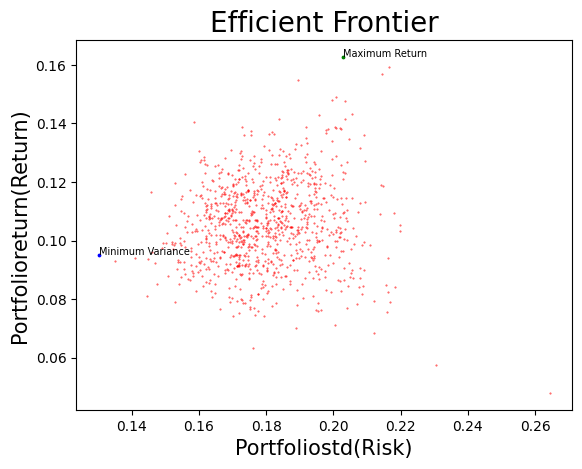

<Figure size 3000x2000 with 0 Axes>

In [ ]:
plt.scatter(stds,returns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
plt.scatter(stds[returns.index(max(returns))], max(returns),c = "green", s=3) #Customise size for this too
plt.text(stds[returns.index(max(returns))],max(returns),"Maximum Return", fontsize=7) #Customise font size for this too
plt.scatter(min(stds),returns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
plt.text(min(stds),returns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
plt.title("Efficient Frontier", fontsize = 20)
plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
plt.figure(figsize=(30,20))
plt.show()

## Finding Max Returns and Associated Risk

In [ ]:
print("Max return =", max(returns))
print("Corresponding Standard Deviation =", stds[returns.index(max(returns))])

Max return = 0.16793499255843128
Corresponding Standard Deviation = 0.2006359396952803


# Creating a Function to Return Weights of Portfolios with Returns >= Max Returns According to Efficient Frontier

In [ ]:
for i in range(10000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    if (portfolioreturn(weights) >= max(returns)):
        weight_new = weights
        print("Your Efficient Portfolio is:",weight_new) #Returns portfolio weights for above condition being satisfied
        break


Your Efficient Portfolio is: [0.41749569 0.22353915 0.00520432 0.02873666 0.08682298 0.02763259
 0.20265645 0.00791215]


In [ ]:
print("Returns corresponding to weights found :",portfolioreturn(weight_new)) #Prints return of found weights
print("Risk associated with weights found :",portfoliostd(weight_new)) #Prints Risk of found weights

Returns corresponding to weights found : 0.1651229747349874
Risk associated with weights found : 0.2043848295060121


In [29]:
def create_fronteir_df(iterations):
  returns = []
  stds = []
  w = []
  sharpes = []

  for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)

    current_returns = portfolioreturn(weights)
    returns.append(current_returns)

    current_std = portfoliostd(weights)
    stds.append(portfoliostd(weights))

    w.append(weights)

    sharpes.append(current_returns/current_std)



  output = pd.DataFrame(
        {
            'Weights' : w,
            'Returns' : returns,
            'Std' : stds,
            'Sharpe Value': sharpes
        }
    )


  return output

In [30]:
df = create_fronteir_df(1000)

In [32]:
best_sharpe = df[df['Sharpe Value'] == df['Sharpe Value'].max()]

In [33]:
best_sharpe

,Weights,Returns,Std,Sharpe Value
259,"[0.1488631119111457, 0.2458824916219699, 0.002...",0.128502,0.156013,0.823665
